<a href="https://colab.research.google.com/github/gitmattalves/EDA_IMDB/blob/main/Projeto_An%C3%A1lise_Explorat%C3%B3ria_de_Dados_com_Python_e_Linguagem_SQL_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neste Projeto vamos apresentar um guia básico de análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Usaremos dados reais disponíveis publicamente, dados sobre filmes no IMDB.

---




Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:


**1- Quais São as Categorias de Filmes Mais Comuns no IMDB?**

**2- Qual o Número de Títulos Por Gênero?**

**3- Qual a Mediana de Avaliação dos Filmes Por Gênero?**

**4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?**

**5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?**

**6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.**

**7- Qual a Relação Entre Duração e Gênero?**

**8- Qual o Número de Filmes Produzidos Por País?**

**9- Quais São os Top 10 Melhores Filmes?**

**10- Quais São os Top 10 Piores Filmes?** 

In [ ]:
# Intalando o pacote com nomos dos paises
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=8b4aba86739b44ccfaaaba2a30003ab25df937a3f9b0390a7d67a7497a4b50a1
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.4 MB/s 


In [ ]:
# Importando os pacotes necessarios para o desenvolvimento do projeto

import re
import time
import sqlite3
import sweetviz as sv
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style = 'darkgrid')

In [ ]:
pip install imdb-sqlite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
time
!imdb-sqlite

2022-09-15 00:07:03,157 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2022-09-15 00:07:05,651 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2022-09-15 00:07:06,832 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2022-09-15 00:07:09,184 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2022-09-15 00:07:11,872 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2022-09-15 00:07:12,567 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2022-09-15 00:07:12,708 Populating database: imdb.db
2022-09-15 00:07:12,708 Applying schema
2022-09-15 00:07:12,710 Importing file: downloads/name.basics.tsv.gz
2022-09-15 00:07:12,711 Reading number of rows ...
2022-09-15 00:07:19,283 Inserting rows into table: people
100% 11926821/11926821 [02:11<00:00, 90960.05 rows/s]
2022-09-15 00:0

In [ ]:
conx = sqlite3.connect('imdb.db')

In [ ]:
# Extrai a lista de de tabelas
tabelas = pd.read_sql_query("SELECT NAME as 'Table_Name' FROM sqlite_master WHERE type = 'table'", conx)

In [ ]:
type(tabelas)

pandas.core.frame.DataFrame

In [ ]:
# visualizar os resultados
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [ ]:
# convertendo o dataframe em lista
tabelas = tabelas['Table_Name'].values.tolist()

In [ ]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conx)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




In [ ]:
# Cria cunsulta SQL
consulta1 = 'select type, count(*) as count from titles group by type'

In [ ]:
# Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conx)

In [ ]:
# Visualiza o resultado
resultado1

,type,count
0,movie,621232
1,short,889374
2,tvEpisode,6955704
3,tvMiniSeries,45127
4,tvMovie,137563
5,tvPilot,2
6,tvSeries,231057
7,tvShort,10670
8,tvSpecial,38295
9,video,265189


In [ ]:
# Calculando o percentual para cada tipo
resultado1['percentual'] = (resultado1['count'] / resultado1['count'].sum())*100
resultado1

,type,count,percentual
0,movie,621232,6.733200
1,short,889374,9.639448
2,tvEpisode,6955704,75.389144
3,tvMiniSeries,45127,0.489107
4,tvMovie,137563,1.490972
5,tvPilot,2,0.000022
6,tvSeries,231057,2.504303
7,tvShort,10670,0.115646
8,tvSpecial,38295,0.415059
9,video,265189,2.874241


In [ ]:
# Mostrando na ordem de maior %
resultado1.sort_values(by= 'count', ascending=False)

,type,count,percentual
2,tvEpisode,6955704,75.389144
1,short,889374,9.639448
0,movie,621232,6.733200
9,video,265189,2.874241
6,tvSeries,231057,2.504303
4,tvMovie,137563,1.490972
3,tvMiniSeries,45127,0.489107
8,tvSpecial,38295,0.415059
10,videoGame,32187,0.348858
7,tvShort,10670,0.115646


In [ ]:
percent = [75.389144, 9.639448, 6.733200, 2.874241, 2.504303 ]
tipo = ['tvEpisode', 'short', 'movie','video', 'tvSeries'  ]

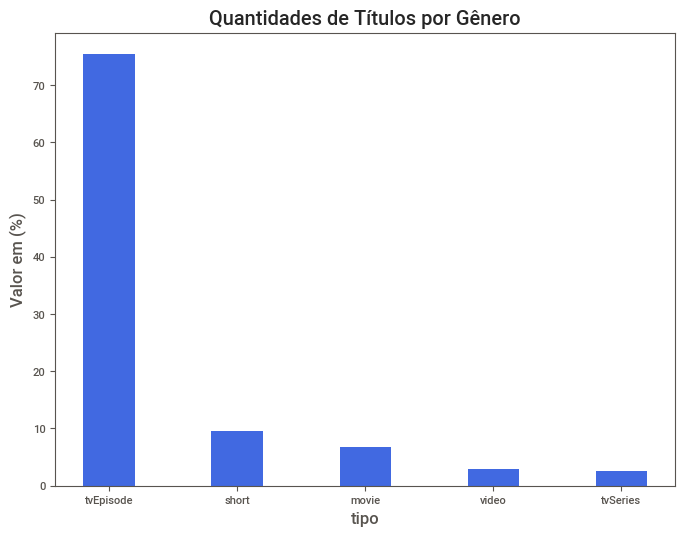

In [ ]:
# Plotando o gráfico

plt.figure(figsize=(8,6))
plt.bar(tipo,percent, width=0.40, color=['royalblue'])

plt.ylim()
plt.title('Quantidade de Títulos por Gênero')
plt.ylabel('Valor em (%)')
plt.xlabel('tipo')
plt.show()

In [ ]:
# Criando um gráfico com apenas 4 categorias
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Criando um dicionário vazio
others = {}

# Filtro do percentual em 5% e soma o total
others['count'] = resultado1[resultado1['percentual'] < 5] ['count'].sum()

# Gravando o percentual
others['percentual']= resultado1[resultado1['percentual']< 5]['percentual'].sum()

# ajustando o nome
others['type'] = 'others'

# Visualizando
others

{'count': 760090, 'percentual': 8.238207751669123, 'type': 'others'}

In [ ]:
# Filtrando o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [ ]:
# Append o dataframe de resultado
resultado1 = resultado1.append(others, ignore_index= True)

In [ ]:
# Ordenando o resultado
resultado1 = resultado1.sort_values(by='count', ascending = False)

#Visualizando
resultado1

,type,count,percentual
2,tvEpisode,6955704,75.389144
1,short,889374,9.639448
3,others,760090,8.238208
0,movie,621232,6.733200


In [ ]:
# Ajusta os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

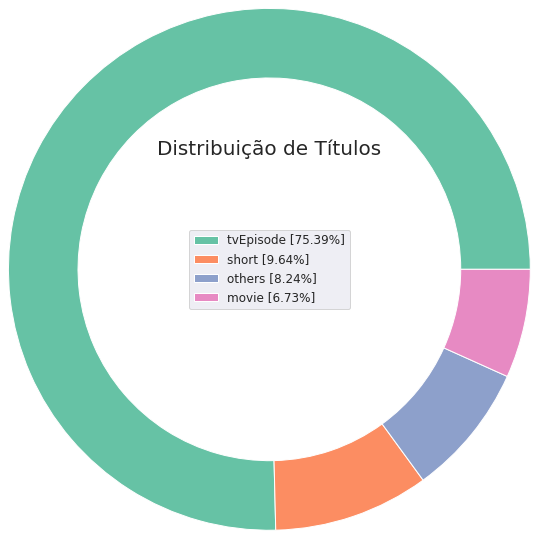

In [ ]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set2(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resultado1['count'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()